In [1]:
import cPickle as pickle
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np
import mxnet as mx
import mx_layers as layers

In [2]:
n_residual_layers = 4

In [3]:
accuracy, progress = pickle.load(open('info/sparse-residual-network-on-shrinked-mnist-4-round0', 'rb'))
accuracy

0.5132364649681529

In [4]:
parameters, states = pickle.load(open('parameters/sparse-residual-network-on-shrinked-mnist-4-round0', 'rb'))

In [5]:
def feature_map_variance(feature_maps):
    N, C, W, H = feature_maps.shape
    feature_maps = feature_maps.reshape((N, C, W * H))
    mean = mx.nd.mean(feature_maps, axis=2, keepdims=True)
    variance = mx.nd.mean((feature_maps - mean) ** 2, axis=1, keepdims=True)
    return mx.nd.mean(variance)

In [6]:
def _normalized_convolution(index, **kwargs):
  network = layers.convolution(no_bias=True, name='convolution%d' % index, **kwargs)
  network = layers.batch_normalization(network, fix_gamma=False, name='batchnorm%d' % index)
  network = layers.ReLU(network)
  return network

In [7]:
kwargs = {'n_filters' : 16, 'kernel_shape' : (5, 5), 'stride' : (1, 1), 'pad' : (2, 2)}
network = layers.variable('data')
for index in range(1):
  network = _normalized_convolution(index, X=network, **kwargs)
  network = layers.pooling(X=network, mode='maximum', kernel_shape=(2, 2), stride=(2, 2), pad=(0, 0))

In [8]:
context = mx.cpu()
args = {key : mx.nd.array(value, context) for key, value in parameters.items()}
aux_states = {key : mx.nd.array(value, context) for key, value in states.items()}

In [9]:
from data_utilities import load_mnist
stretched_mnist = load_mnist(path='stretched_mnist', scale=1, shape=(1, 56, 56))
stretched_canvas_mnist = load_mnist(path='stretched_canvas_mnist', scale=1, shape=(1, 56, 56))

In [10]:
N = 1000
args['data'] = mx.nd.array(stretched_mnist[4], context)[:N]
executor = network.bind(context, args, aux_states=aux_states)
feature_maps = executor.forward()[0]
feature_map_variance(feature_maps).asscalar()

0.30867717

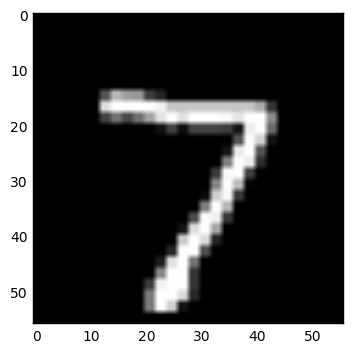

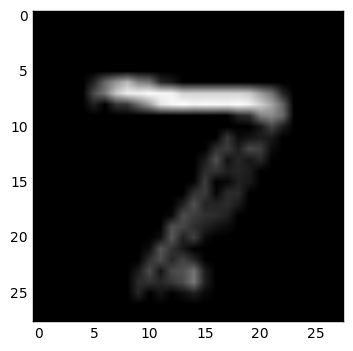

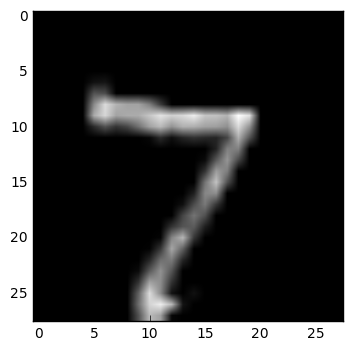

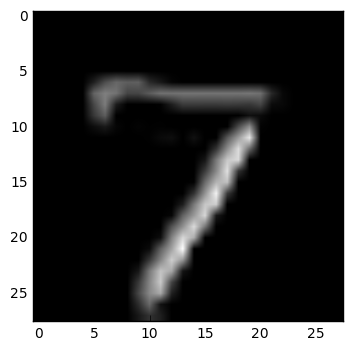

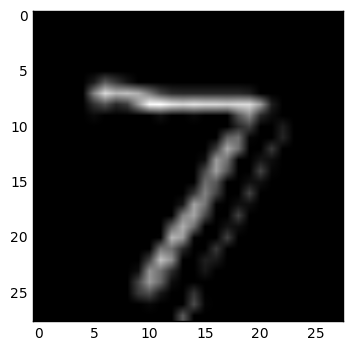

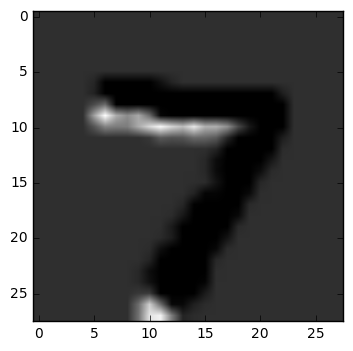

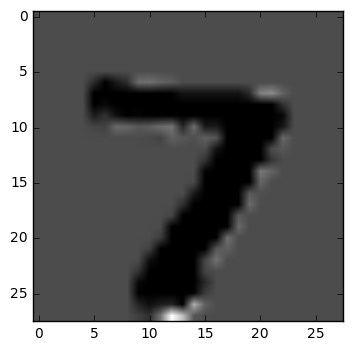

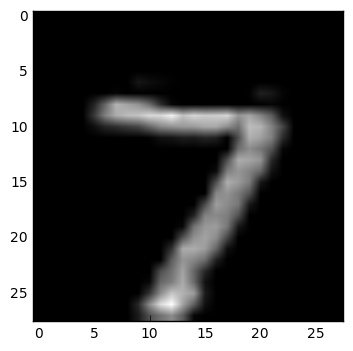

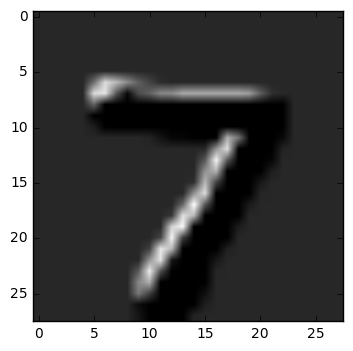

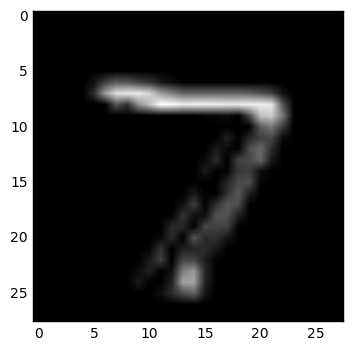

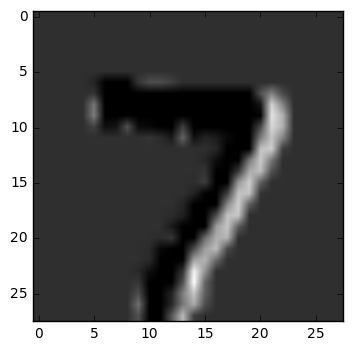

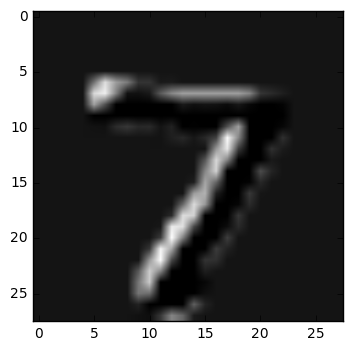

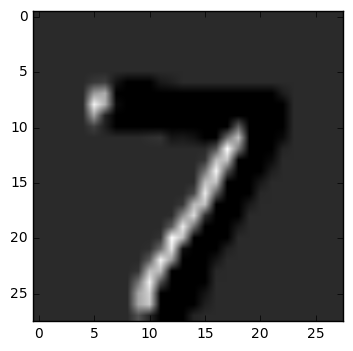

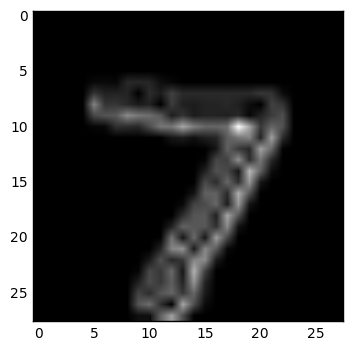

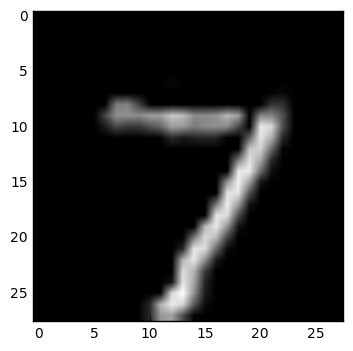

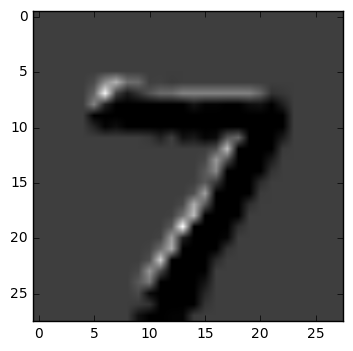

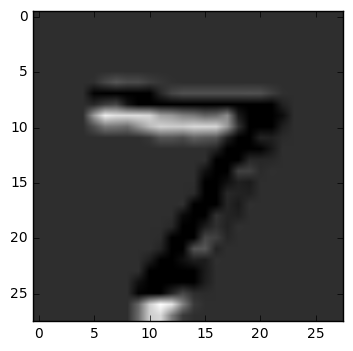

In [11]:
index = 0
pl.figure()
pl.imshow(stretched_mnist[4][index][0], cmap='gray')
feature_map = feature_maps[index].asnumpy()
# feature_map = np.sum(feature_map, axis=0)
for f in feature_map:
    pl.figure()
    pl.imshow(f, cmap='gray')

In [12]:
args['data'][:] = mx.nd.array(stretched_canvas_mnist[4], context)[:N]
feature_maps = executor.forward()[0]
feature_map_variance(feature_maps).asscalar()

0.15088949

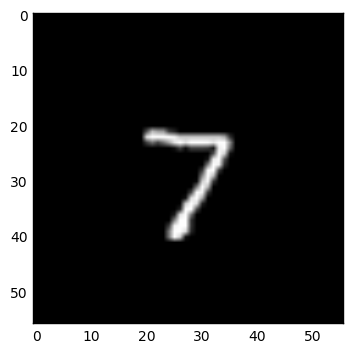

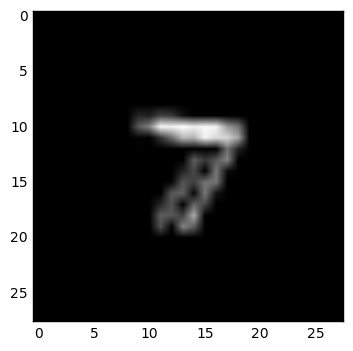

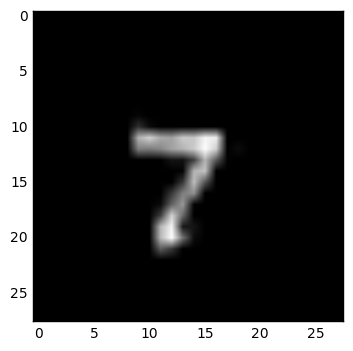

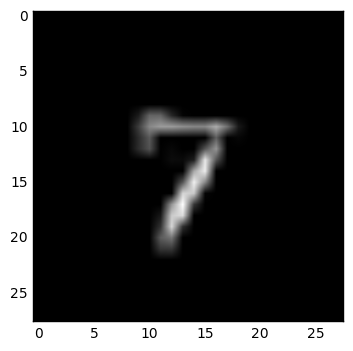

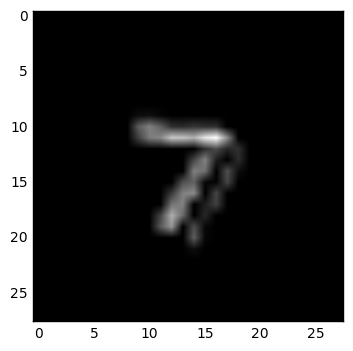

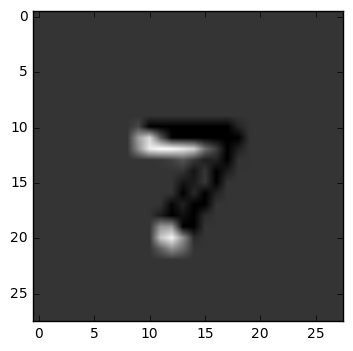

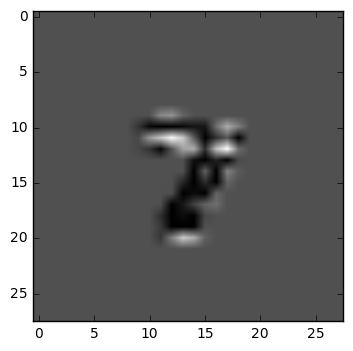

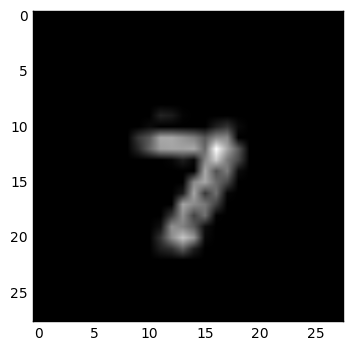

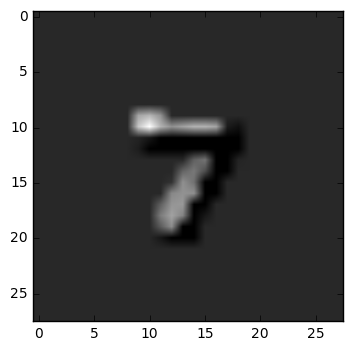

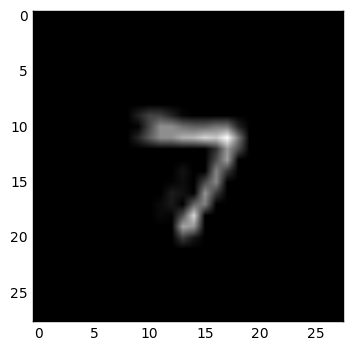

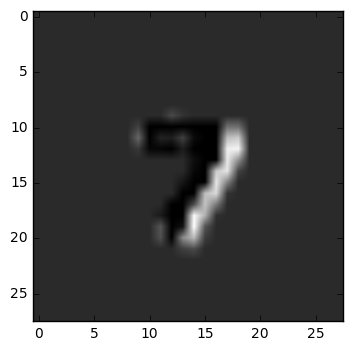

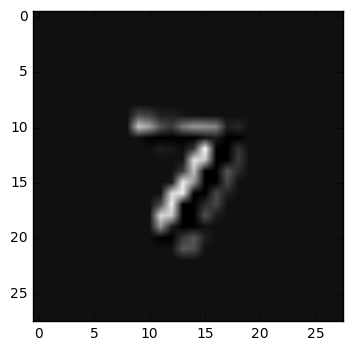

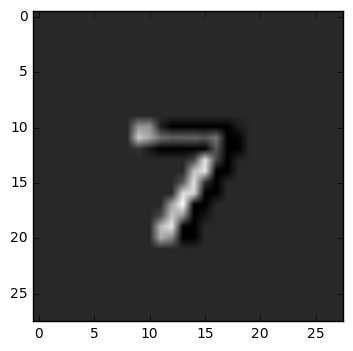

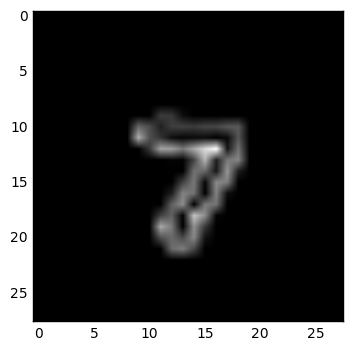

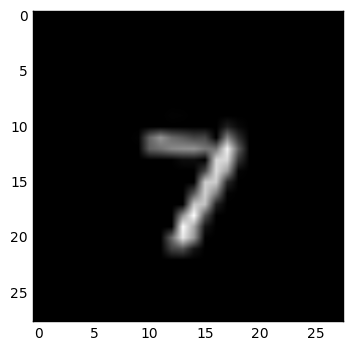

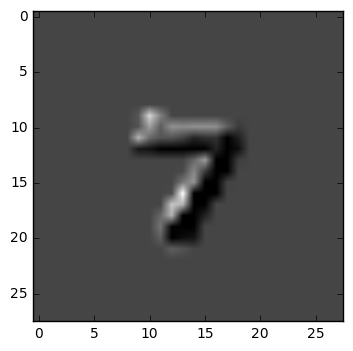

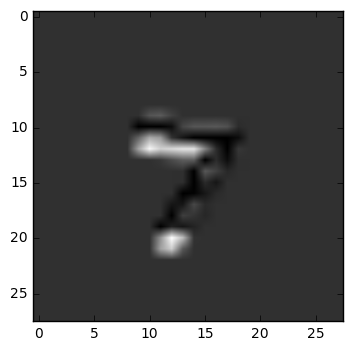

In [13]:
index = 0
pl.figure()
pl.imshow(stretched_canvas_mnist[4][index][0], cmap='gray')
feature_map = feature_maps[index].asnumpy()
# feature_map = np.sum(feature_map, axis=0)
for f in feature_map:
    pl.figure()
    pl.imshow(f, cmap='gray')

In [14]:
network = layers.variable('data')
for index in range(2):
  network = _normalized_convolution(index, X=network, **kwargs)
  network = layers.pooling(X=network, mode='maximum', kernel_shape=(2, 2), stride=(2, 2), pad=(0, 0))

In [15]:
args['data'] = mx.nd.array(stretched_mnist[4], context)[:N]
executor = network.bind(context, args, aux_states=aux_states)
feature_maps = executor.forward()[0]
feature_map_variance(feature_maps).asscalar()

0.27072954

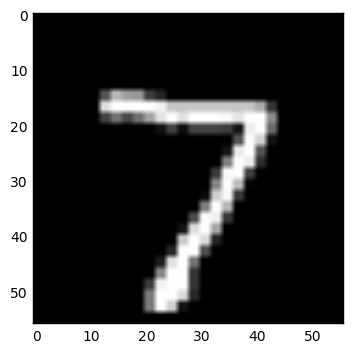

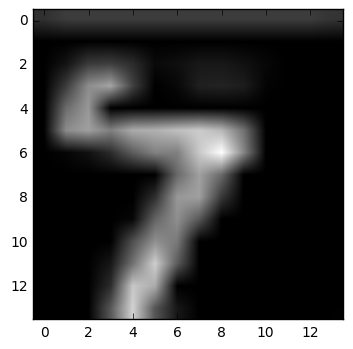

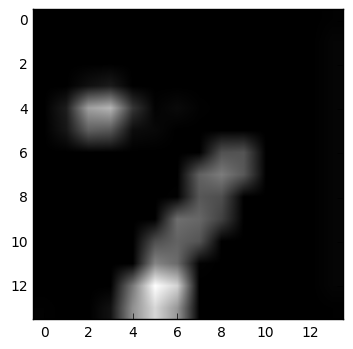

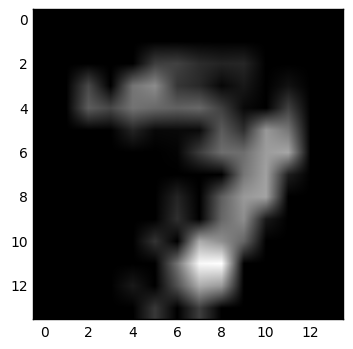

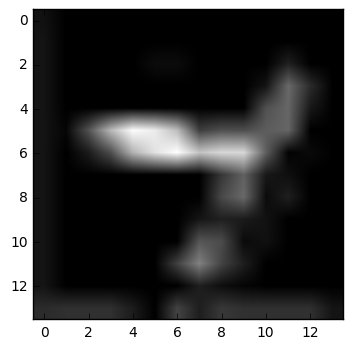

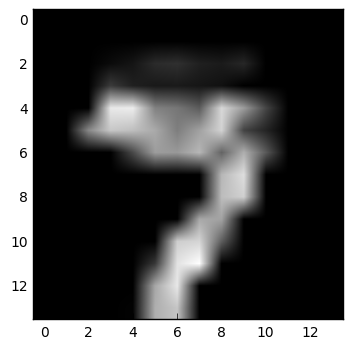

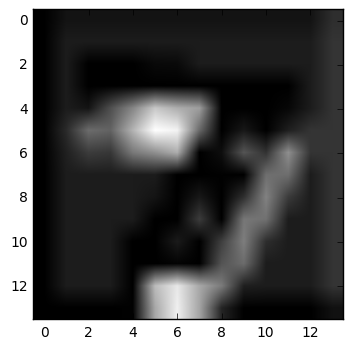

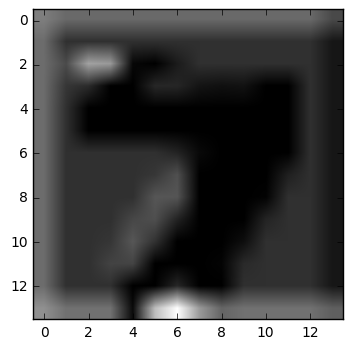

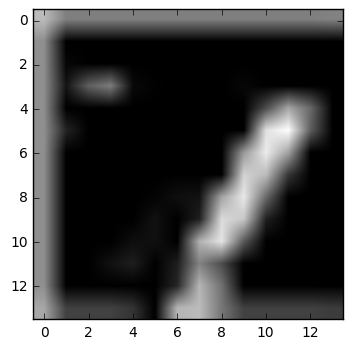

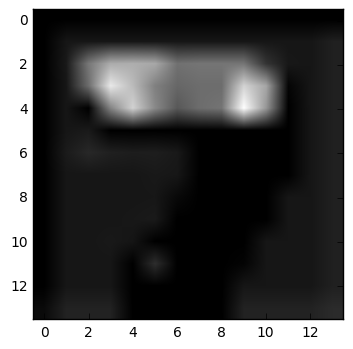

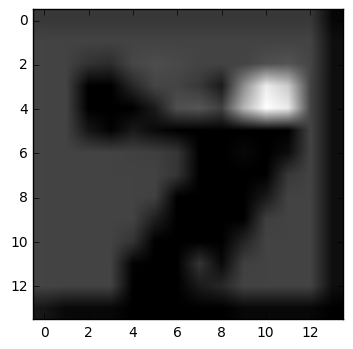

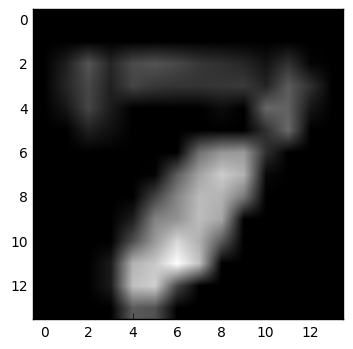

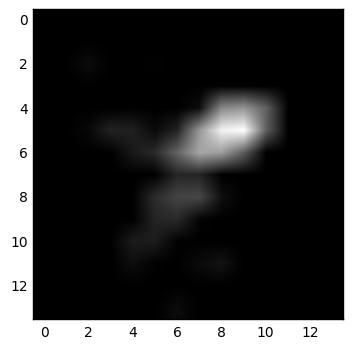

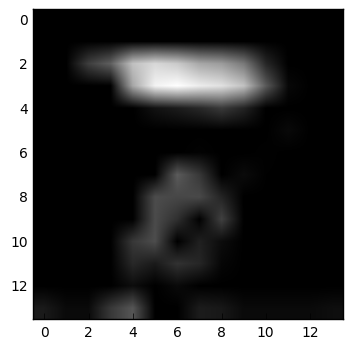

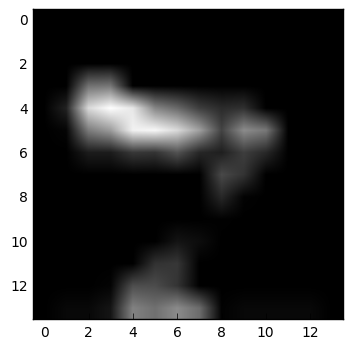

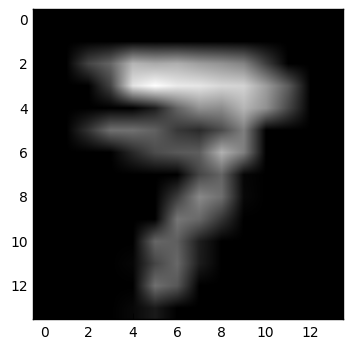

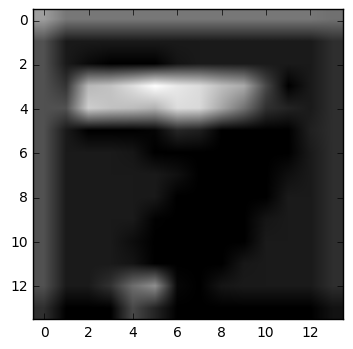

In [16]:
index = 0
pl.figure()
pl.imshow(stretched_mnist[4][index][0], cmap='gray')
feature_map = feature_maps[index].asnumpy()
# feature_map = np.sum(feature_map, axis=0)
for f in feature_map:
    pl.figure()
    pl.imshow(f, cmap='gray')

In [17]:
args['data'][:] = mx.nd.array(stretched_canvas_mnist[4], context)[:N]
feature_maps = executor.forward()[0]
feature_map_variance(feature_maps).asscalar()

0.1482196

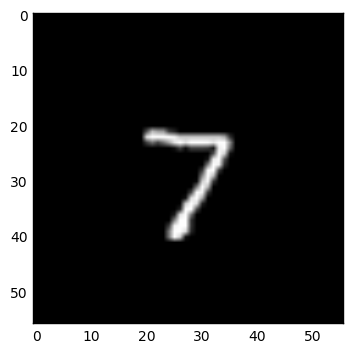

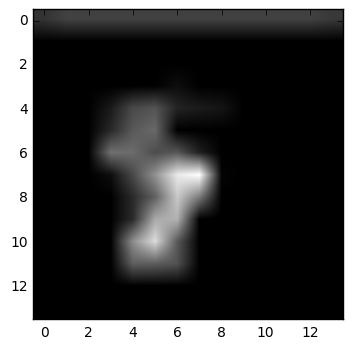

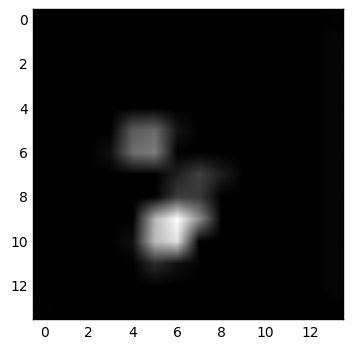

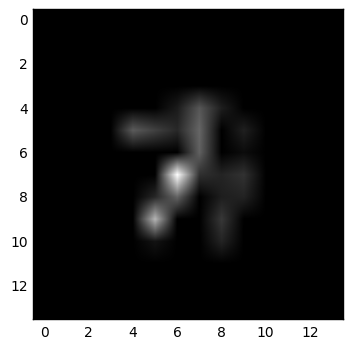

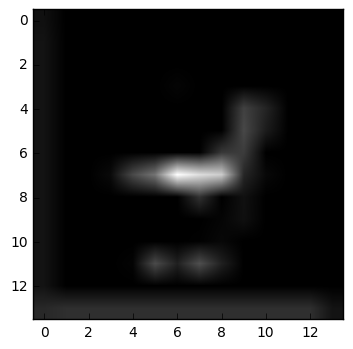

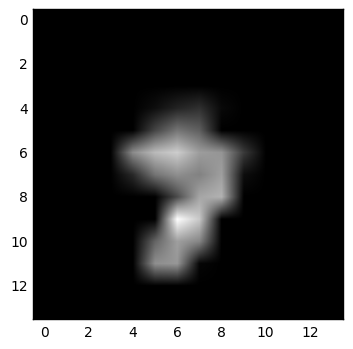

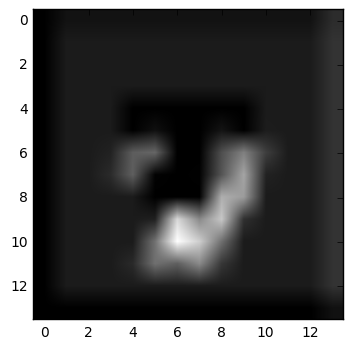

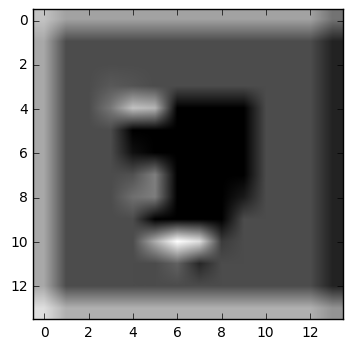

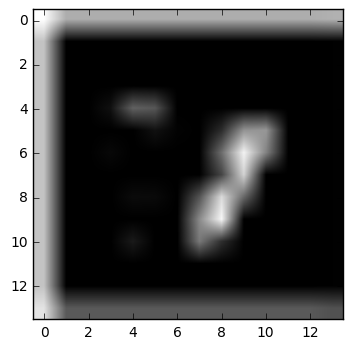

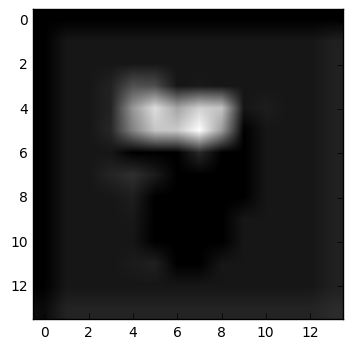

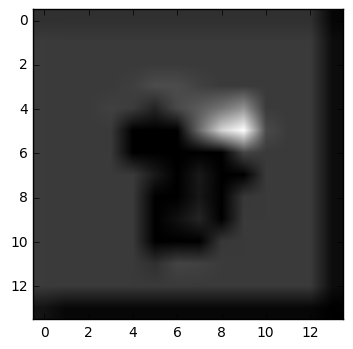

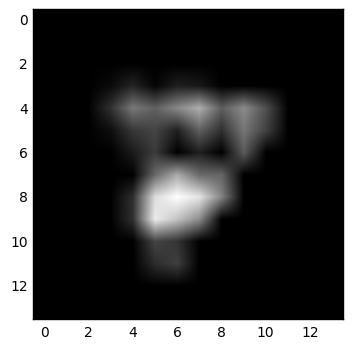

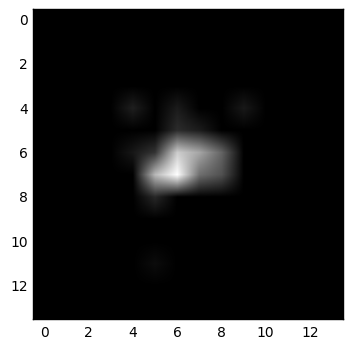

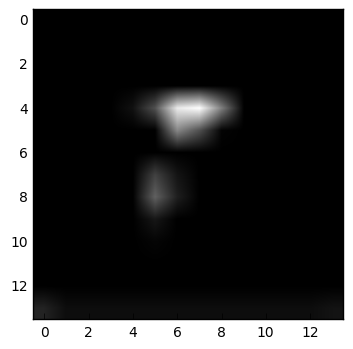

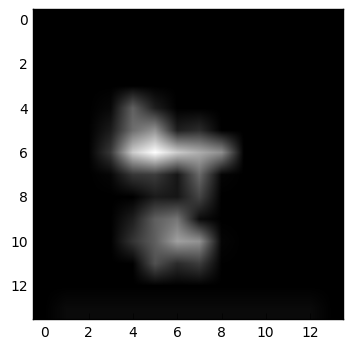

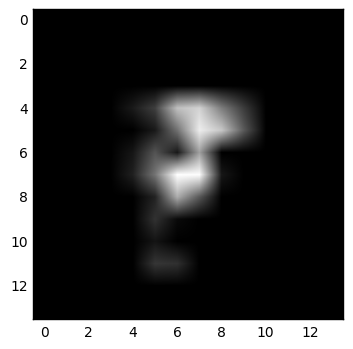

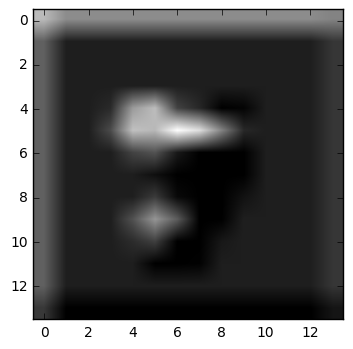

In [18]:
index = 0
pl.figure()
pl.imshow(stretched_canvas_mnist[4][index][0], cmap='gray')
feature_map = feature_maps[index].asnumpy()
# feature_map = np.sum(feature_map, axis=0)
for f in feature_map:
    pl.figure()
    pl.imshow(f, cmap='gray')

In [19]:
network = layers.variable('data')
for index in range(3):
  network = _normalized_convolution(index, X=network, **kwargs)
  network = layers.pooling(X=network, mode='maximum', kernel_shape=(2, 2), stride=(2, 2), pad=(0, 0))

In [20]:
args['data'] = mx.nd.array(stretched_mnist[4], context)[:N]
executor = network.bind(context, args, aux_states=aux_states)
feature_maps = executor.forward()[0]
feature_map_variance(feature_maps).asscalar()

0.051677078

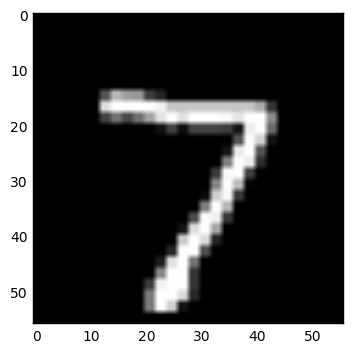

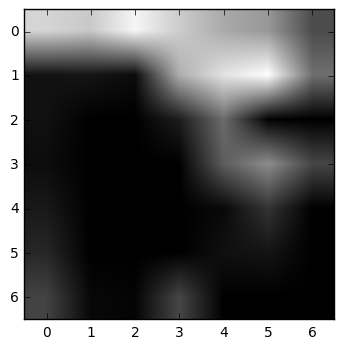

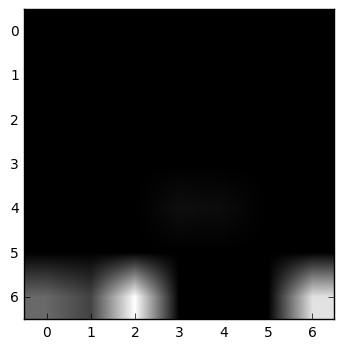

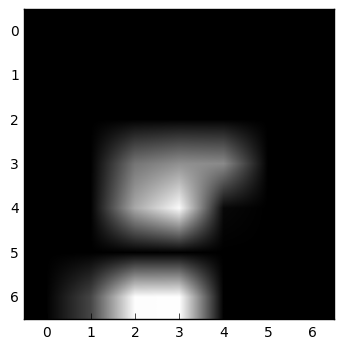

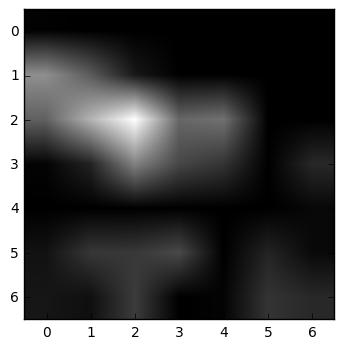

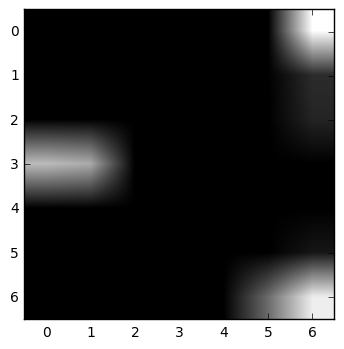

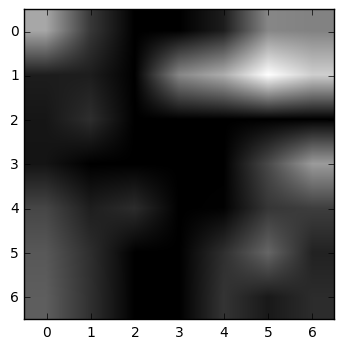

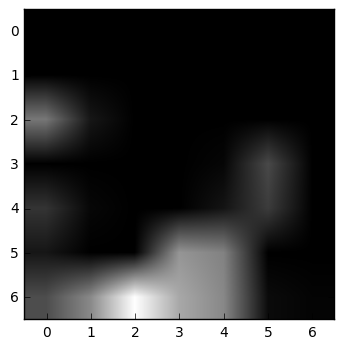

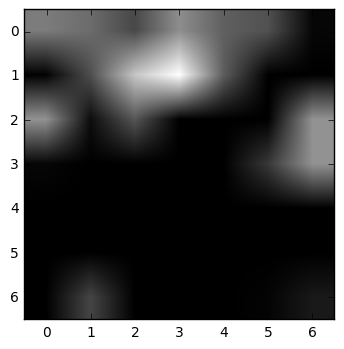

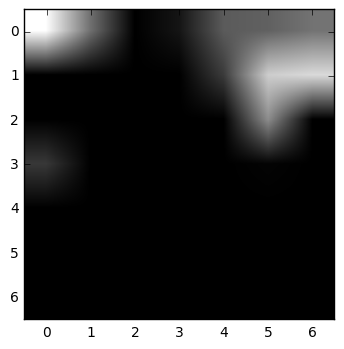

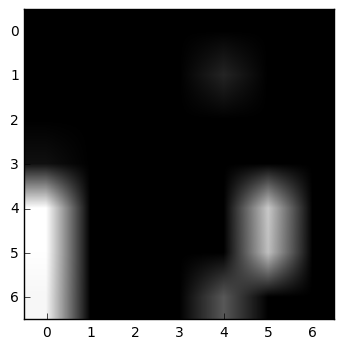

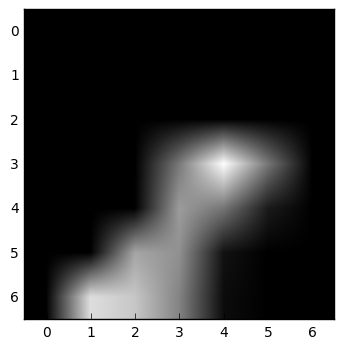

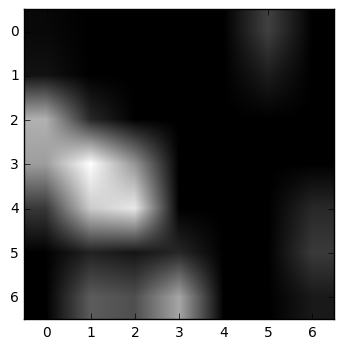

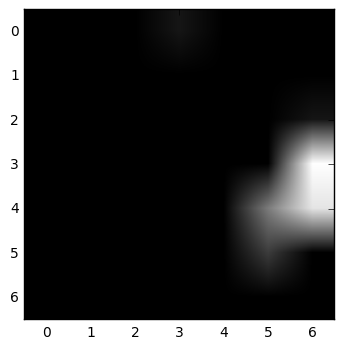

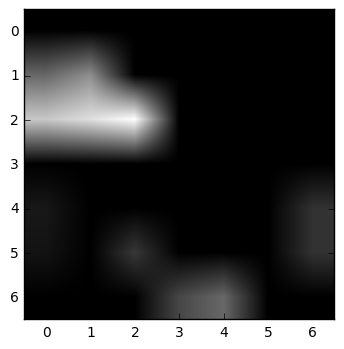

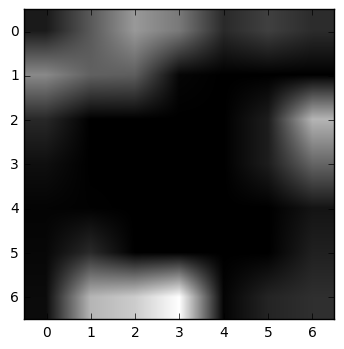

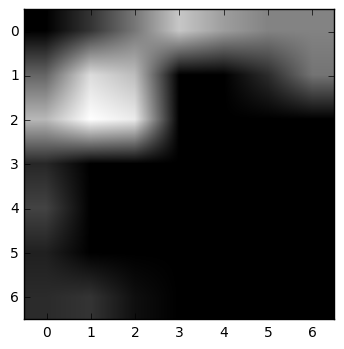

In [21]:
index = 0
pl.figure()
pl.imshow(stretched_mnist[4][index][0], cmap='gray')
feature_map = feature_maps[index].asnumpy()
# feature_map = np.sum(feature_map, axis=0)
for f in feature_map:
    pl.figure()
    pl.imshow(f, cmap='gray')

In [22]:
args['data'][:] = mx.nd.array(stretched_canvas_mnist[4], context)[:N]
feature_maps = executor.forward()[0]
feature_map_variance(feature_maps).asscalar()

0.031710815

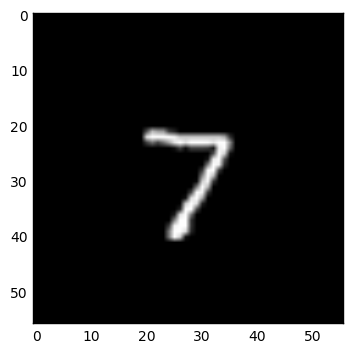

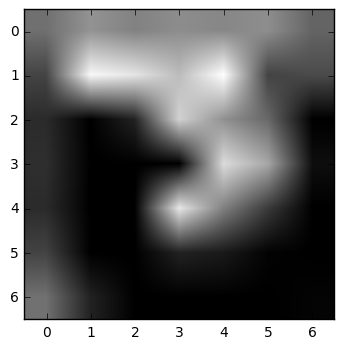

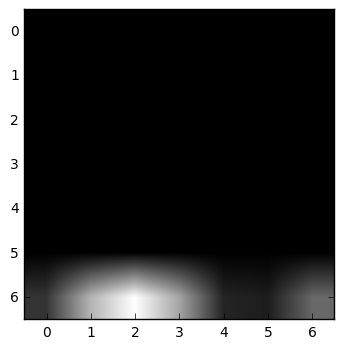

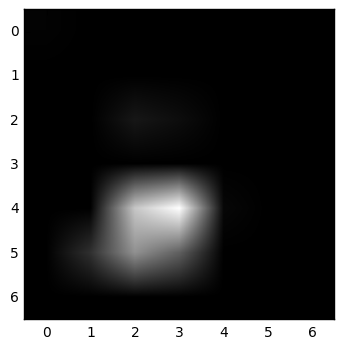

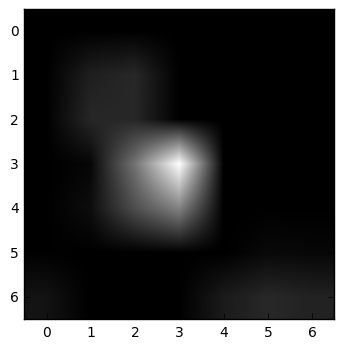

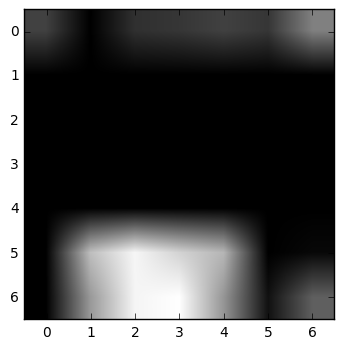

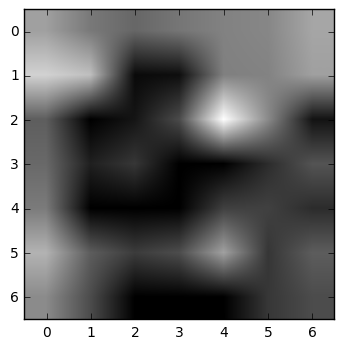

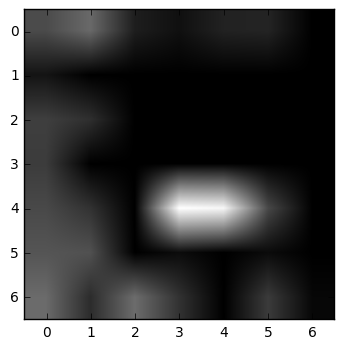

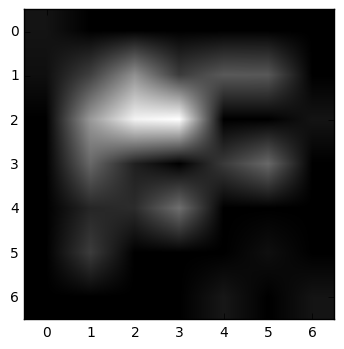

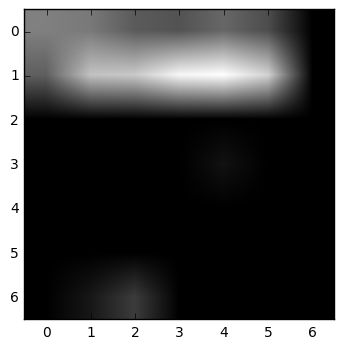

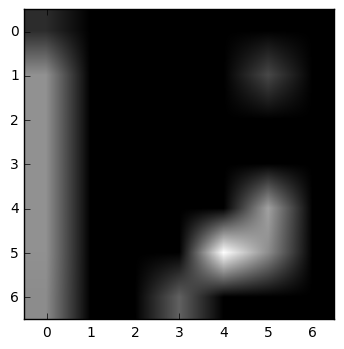

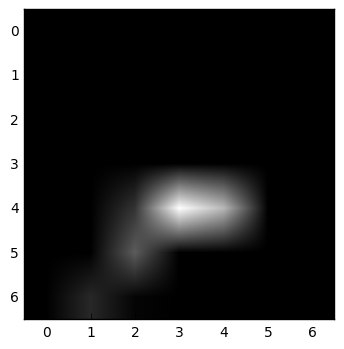

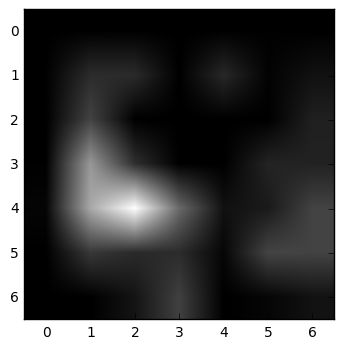

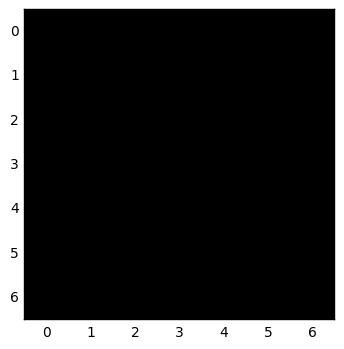

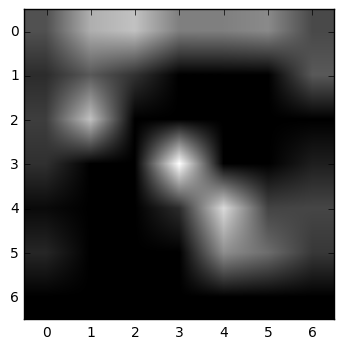

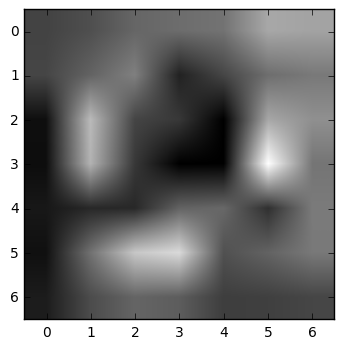

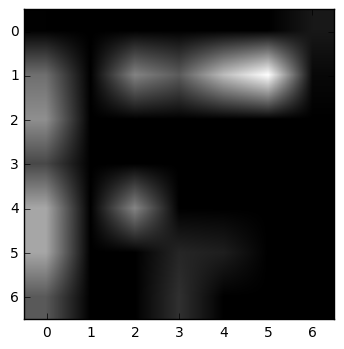

In [23]:
index = 0
pl.figure()
pl.imshow(stretched_canvas_mnist[4][index][0], cmap='gray')
feature_map = feature_maps[index].asnumpy()
# feature_map = np.sum(feature_map, axis=0)
for f in feature_map:
    pl.figure()
    pl.imshow(f, cmap='gray')